<img src="./img/logo_UTN.svg" align="right" width="150" /> 

#### Teoría de los Circuitos 2

# Trabajo semanal 5
#### Tomas A. Albanesi


## Indice de contenidos:
* [Consigna](#consigna)
* [Punto 1.a](#punto1a)
* [Punto 1.b](#punto1b)
* [Punto 1.c](#punto1c)
* [Punto 1.d](#punto1d)
* [Conclusiones generales](#conclusiones)

## Consigna <a class="anchor" id="consigna"></a>

<img src="./img/ConsignaParte1.png" width="700" />
<img src="./img/ConsignaParte2.png" width="700" />
<img src="./img/ConsignaParte3.png" width="700" /> 

## 1. a. Determine la expresión de H(s) del filtro pasa-altos normalizado <a class="anchor" id="punto1a"></a>

### Resolucion analitica <a class="anchor" id="punto1a"></a>

#### Pasa bajos prototipo

In [5]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS5_Albanesi_Punto1aAnaliticoLP.pdf", width=1000, height=1000)

#### Pasa altos

In [6]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS5_Albanesi_Punto1aAnaliticoHP.pdf", width=1000, height=1000)

## 1. b. Realizar el diagrama de polos y ceros de H(s) <a class="anchor" id="punto1b"></a>

### Resolucion analitica  <a class="anchor" id="punto2a"></a>

In [7]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS5_Albanesi_Punto1bAnalitico.pdf", width=1000, height=1000)

### Simulacion numerica filtro pasa bajos prototipo <a class="anchor" id="punto2a"></a>

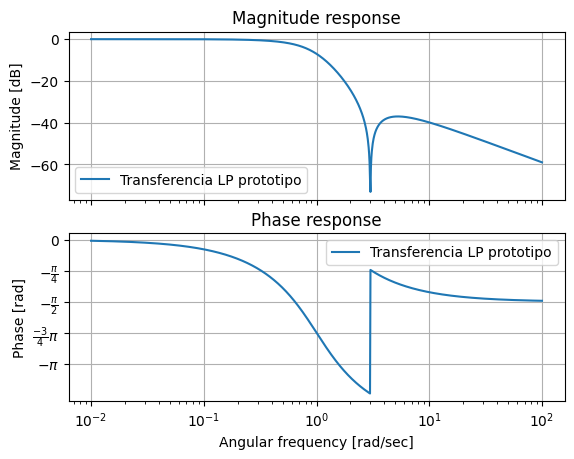

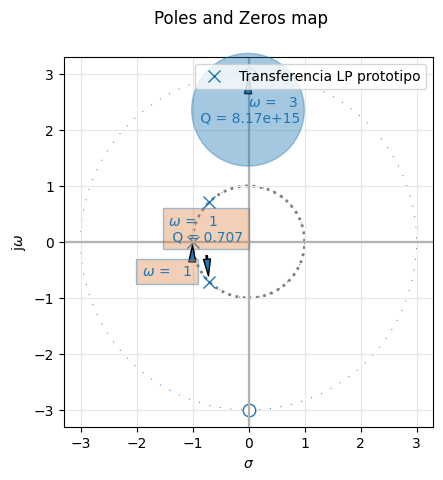

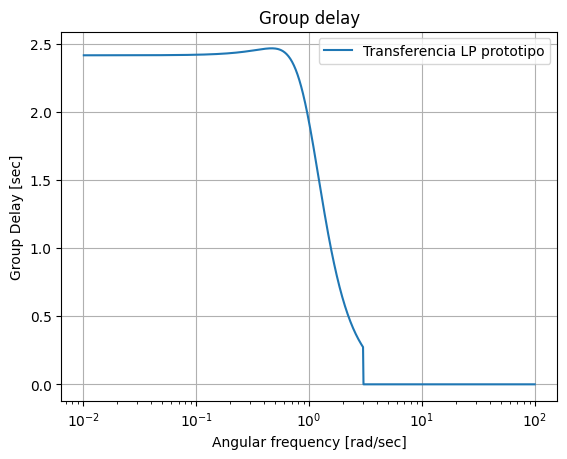

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
from pytc2.sistemas_lineales import analyze_sys, pretty_print_bicuad_omegayq, tf2sos_analog, pretty_print_SOS
from pytc2.general import print_subtitle

w02 = 1
wz2 = 3**2
a = w02/wz2
b = np.sqrt(2)

num = [a*1, 0, a*wz2]
den = [1, (1+b), (1+b), w02]

my_tf = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(my_tf, 'Transferencia LP prototipo')

### Simulacion numerica filtro pasa altos <a class="anchor" id="punto2a"></a>

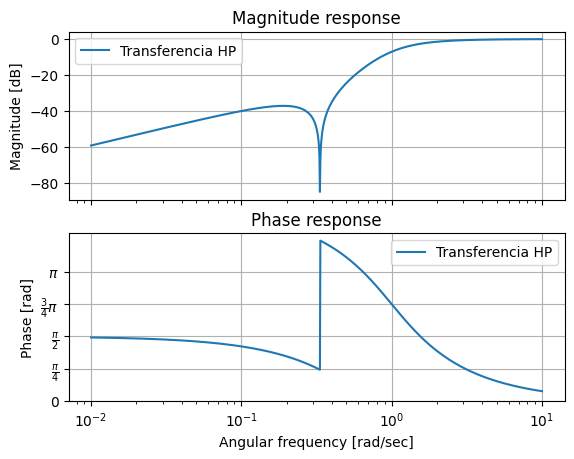

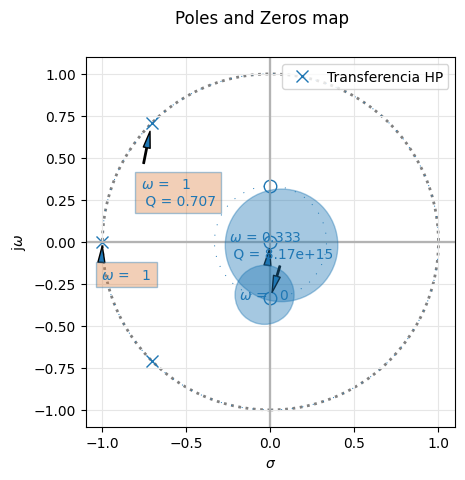

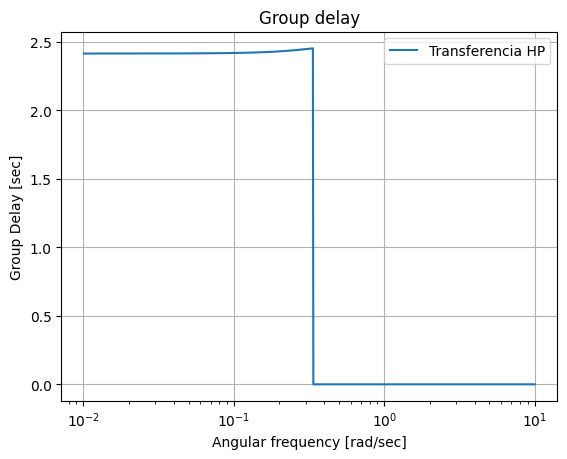

In [11]:
num = [1, 0, (1/9), 0]
den = [1, (1+np.sqrt(2)), (1+np.sqrt(2)), 1]

my_tf = sig.TransferFunction(num, den)

plt.close('all')
analyze_sys(my_tf, 'Transferencia HP')

## 1. c. Sintetice el circuito del filtro pedido con la estructura dada <a class="anchor" id="punto1c"></a>

### Resolucion analitica  <a class="anchor" id="punto3a"></a>

In [14]:
# Incorporacion y visualizacion de PDF
from IPython.display import IFrame
IFrame("./docs/TS5_Albanesi_Punto1cAnalitico.pdf", width=1000, height=1000)

### Simulacion circuital  <a class="anchor" id="punto3a"></a>

#### Denormalizacion numerica de componentes

In [15]:
# Elementos normalizados
Cn = 1
Rn = 1.59
R1n = 0.7071
R2n = 0.6289
R3n = 1

# Norma de impedancia
Wz = 1000

# Norma de frecuencia
Ww = 2*np.pi*300

# Elementos desnormalizados
Cdn = Cn / (Ww* Wz)
Rdn = Rn * Wz
R1dn = R1n * Wz
R2dn = R2n * Wz
R3dn = R3n * Wz

print(f'Cdn: {Cdn}')
print(f'Rdn: {Rdn}')
print(f'R1dn: {R1dn}')
print(f'R2dn: {R2dn}')
print(f'R3dn: {R3dn}')

Cdn: 5.305164769729845e-07
Rdn: 1590.0
R1dn: 707.0999999999999
R2dn: 628.9
R3dn: 1000


#### Circuito en LTSpice

<img src="./img/Circuito.png" width="800" />

#### Simlulacion

<img src="./img/Simulacion.png" width="1000" />

<img src="./img/SimulacionCursores.png" width="1000" />

## 1. d. Compare la estructura sugerida y discuta las similitudes y diferencias con la red propuesta por Schaumann <a class="anchor" id="punto1d"></a>

Comparando se puede observar que ambas estructuras están compuestas parcialmente con un GIC para implementar la etapa de segundo orden.

Sin embargo, la estructura propuesta en este ejercicio necesita de otra etapa RC de primer orden para conseguir el resultado esperado, mientras que la estructura propuesta en el Schaumann es capaz de implementar un circuito Notch pasa-altos (que es lo que se pide en la consigna de la tarea semanal) sin la implementación de otro circuito cuando se cumple que:

* $a > c$
* $b = \frac{c}{2}$

El valor de $c$ establece la ganacia en baja frecuencia y $(2a-c)$ establece la ganancia en alta frecuencia.

## Conclusiones <a class="anchor" id="conclusiones"></a>

Como conclusiones generales, al ser una tarea competitiva, y ademas, estar estos ultimos dias repasando para el parcial, me puse como objetivo realizarla lo mas rapido posible.

Pude llegar a la transferencia del filtro pasa bajos prototipo a partir de la plantilla propuesta y condiciones. Ademas, luego lo verifique realizando la simulacion numerica de la misma.

Luego, aplicando el kernel de transformacion llegue a la transferencia del pasa altos y pude sintetizarlo de forma correcta con la estructura propuesta, verificandolo luego en la simulacion de LTSpice.

Me parecio una tarea semanal muy buena para integrar los conocimientos vistos hasta ahora, desde Butterworth hasta las transferencias bicuadraticas y bilineales.

------------------------------------------------------

Comentario: Si bien estoy utilizando la libreria pytc2 en su ultima version v0.0.3, observe que en los graficos de ceros y polos, cuando aplica los decorados para los ceros, como se puede ver en los graficos anteriores, dimensiona en forma exagerada la figura de datos de algunos ceros.